In [73]:
import json
import csv

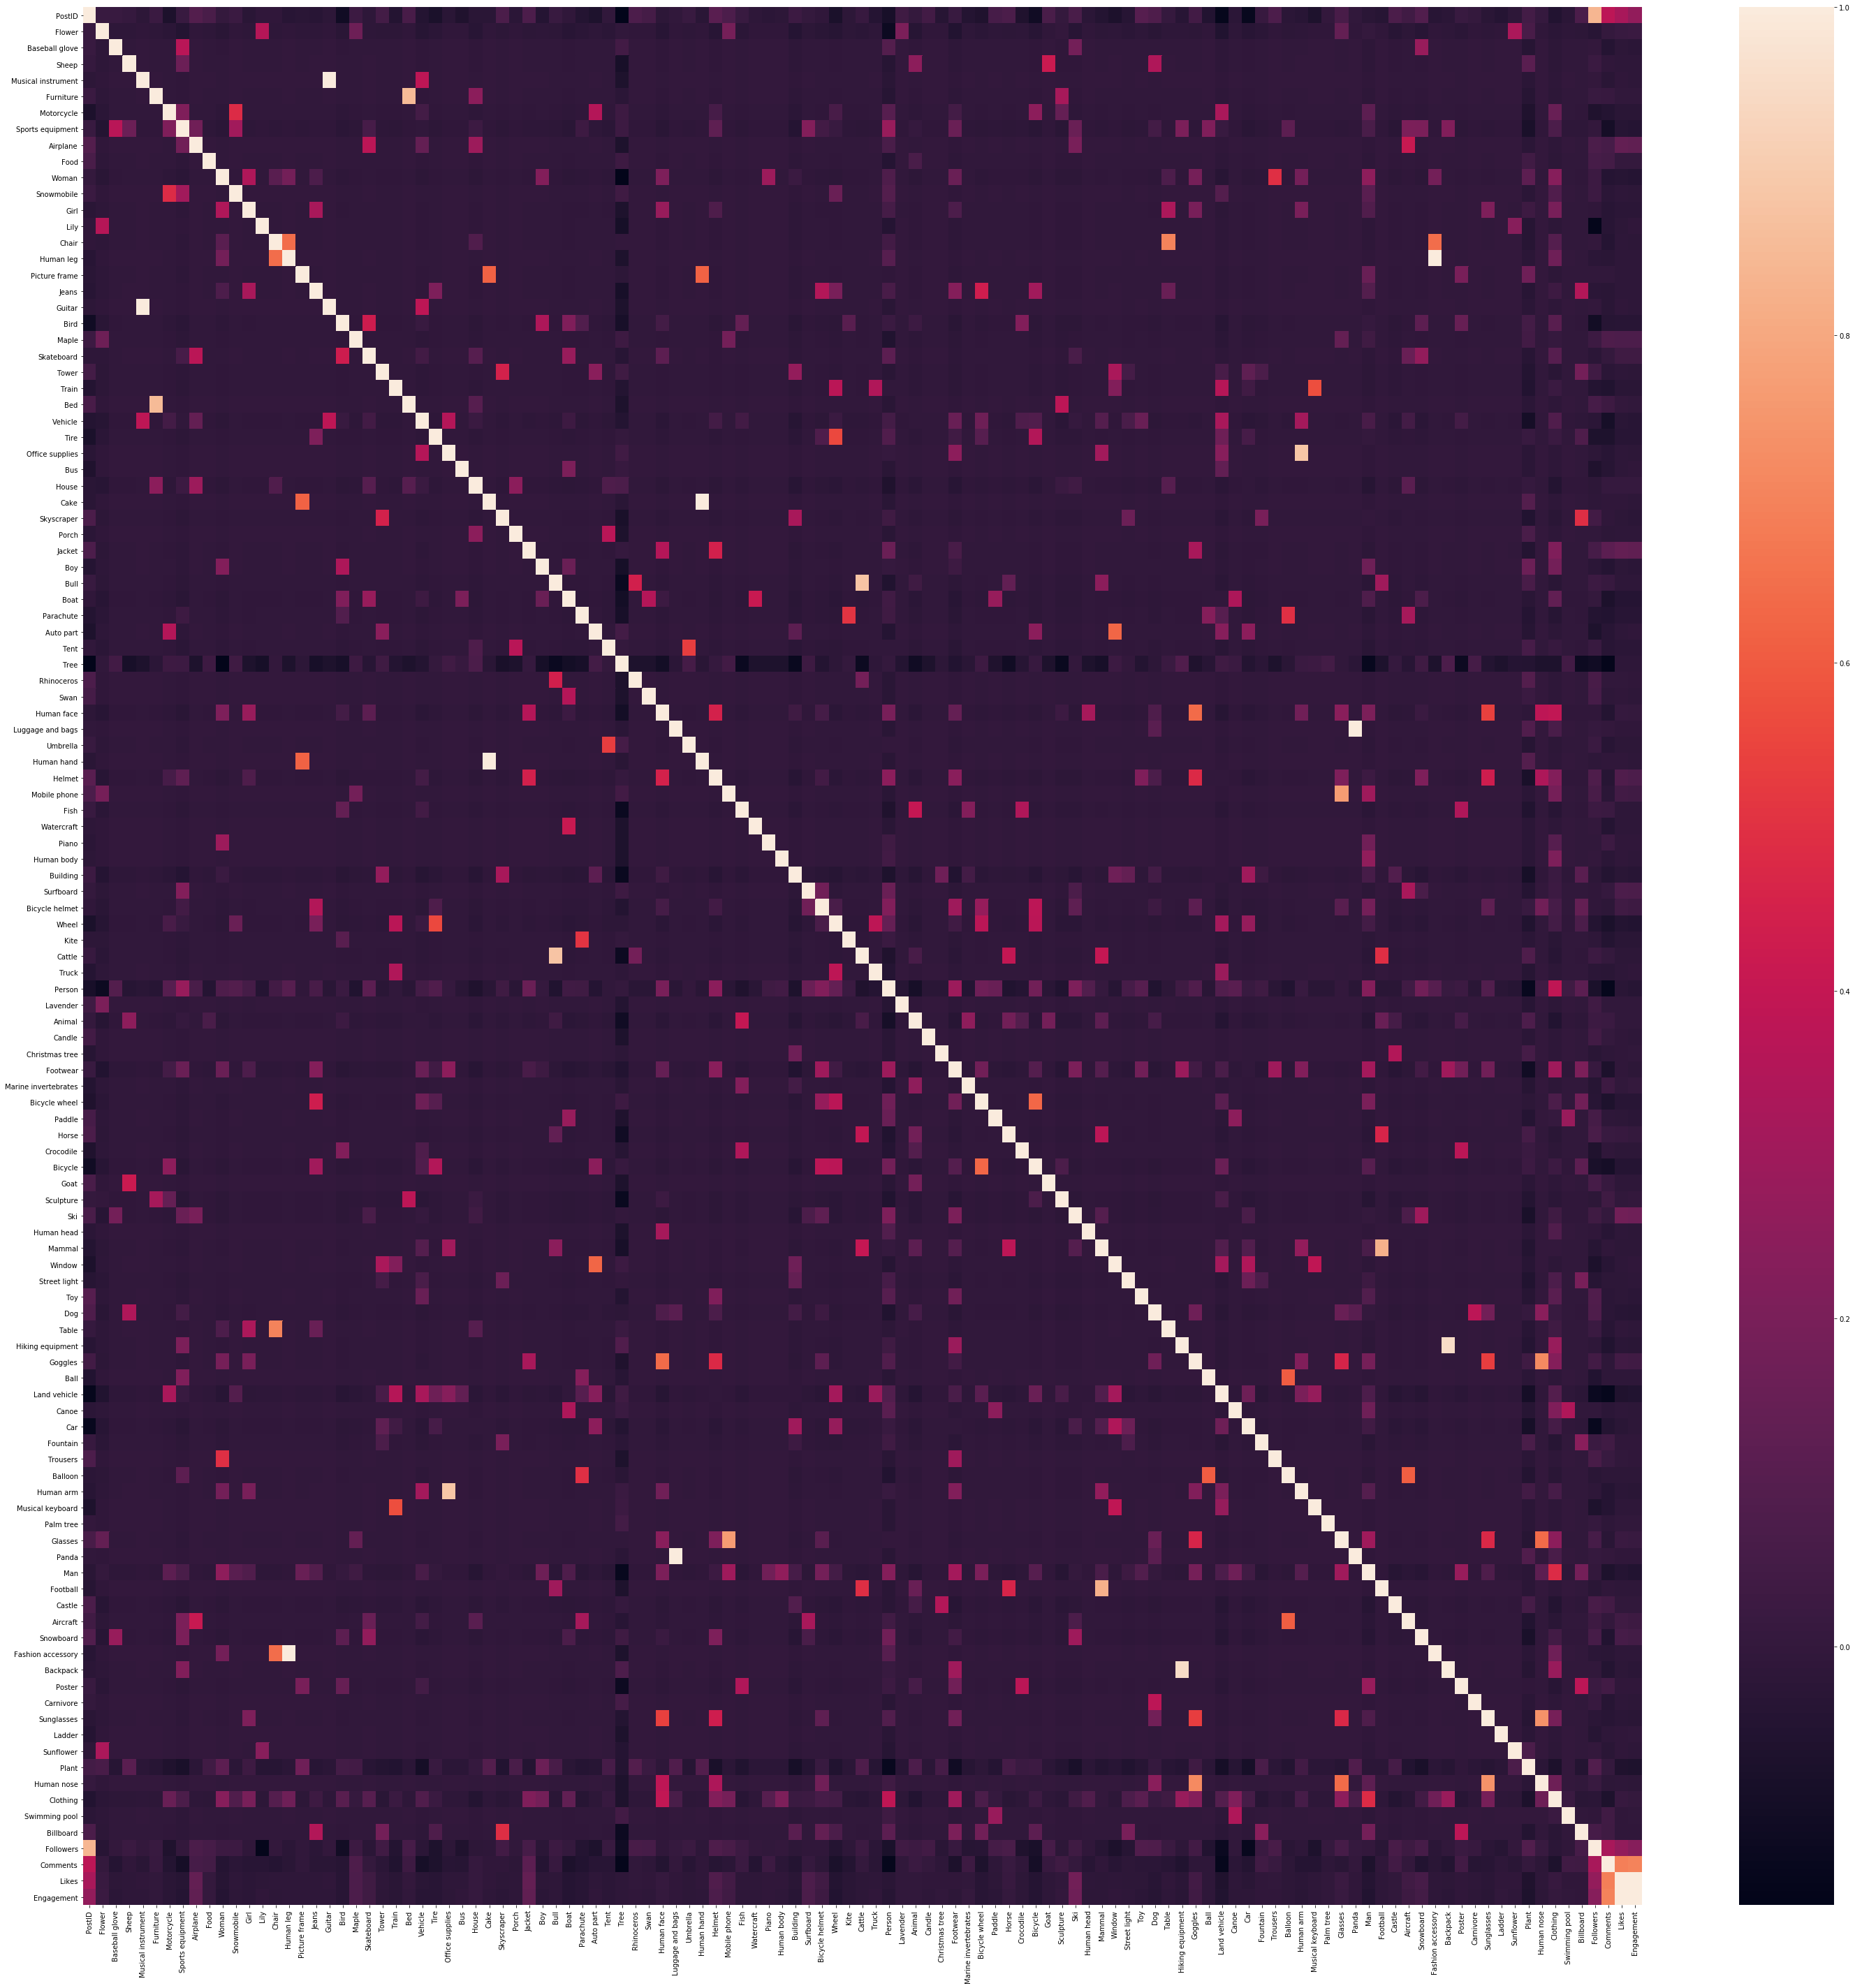

In [74]:
 #Code used to create Image Tag dataset of Post Details & Image Tags
import json
import csv

def main():
    with open('visit_utah_updated_01_19.json', mode = 'r', encoding = 'utf-8') as f: #Open the data that is in a json file and load it into data
        data = json.loads(f.read(), encoding = 'utf-8')
    imagetags = set()
    for photo in data: #Get the column names
        md = photo['metadata'] #The photo's metadata
        tags = md['imageTags'] #Image Tags in the photo found by the API
        fieldnames = ['PageName', 'PostID', 'PostTime']
        for tag in tags:
            imagetags.add(tag['value'])
    with open('Tag_Data.csv', 'w', newline = '') as csvfile:
        writer = csv.writer(csvfile, delimiter = ',')
        length = 6+len(imagetags)
        for tags in imagetags:
            fieldnames.append(tags)
        fieldnames.append('Followers')
        fieldnames.append('Comments')
        fieldnames.append('Likes')
        writer.writerow(fieldnames)
        for photo in data: #Get the data out with the associated column name
            photodata = list(['0']*length)
            md = photo['metadata'] #The photo's metadata
            tags = md['imageTags'] #Tags in the Photo found by the API
            photodata[0] = photo['pageName']
            photodata[1] = photo['extPostId']
            photodata[2] = photo['extCreatedAt']
            i = 3
            for tag1 in imagetags:
                for tag2 in tags:
                    if tag1 == tag2['value']:
                        photodata[i] = tag2['conf']
                        break
                i = i+1
            photodata[length-3] = photo['nFollowers']
            photodata[length-2] = photo['nComments']
            photodata[length-1] = photo['nLikes']
            writer.writerow(photodata)
    print('Done')

if __name__ == '__value__':
    main()

#Import additional packages
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Read in new Object csv file
ds = pd.read_csv('Tag_Data.csv')

#Generate engagement column based on comments, likes & followers
ds['Engagement'] = ((ds['Comments'] + ds['Likes']) / ds['Followers']) * 100


#Print heatmap of correlation among variables in Image Tag Dataset
plt.figure(figsize=(50,50)) #changes image size
sns.heatmap(ds.corr())

#Code to create zoomed in Correlation Matrix
corr=ds.corr() #generate correlation

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_precision(2)\